<a href="https://colab.research.google.com/github/Sibin-S-S/Sibin_DSA_Pathshaala/blob/main/Data_Visualisation_Sibin_S_S_DSA7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

# Univariate Analysis

              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


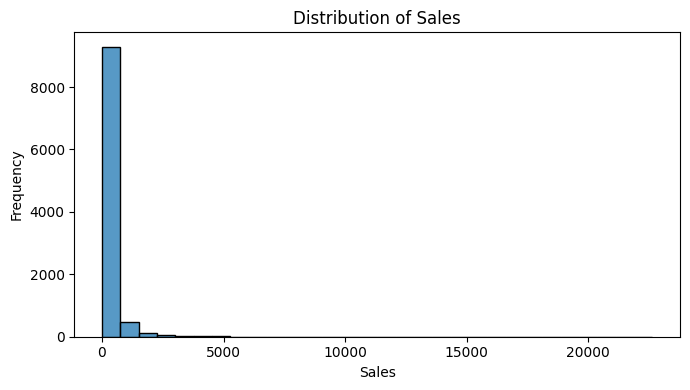

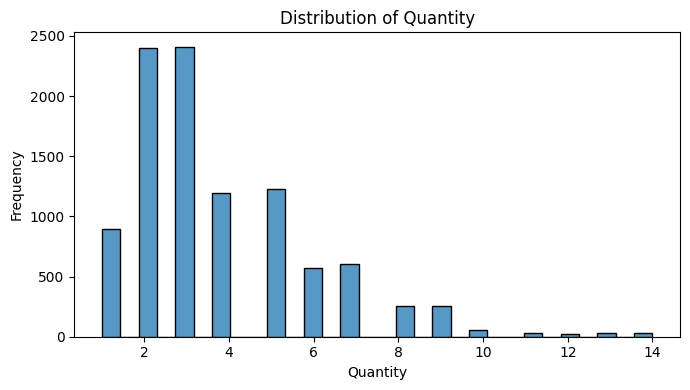

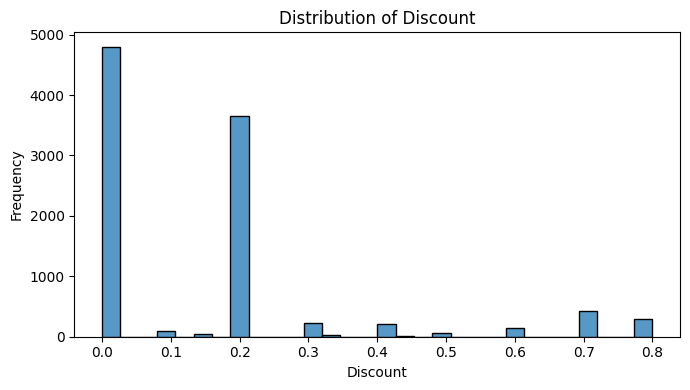

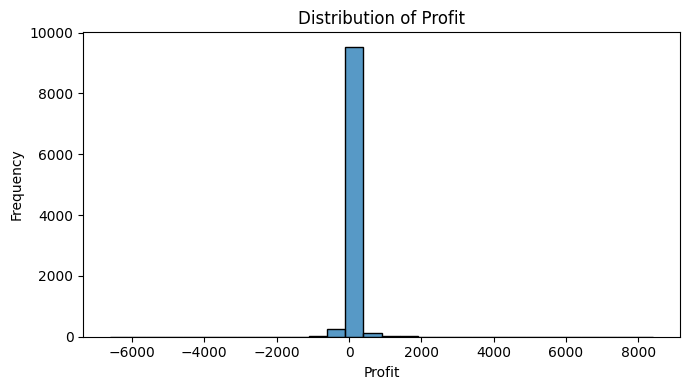

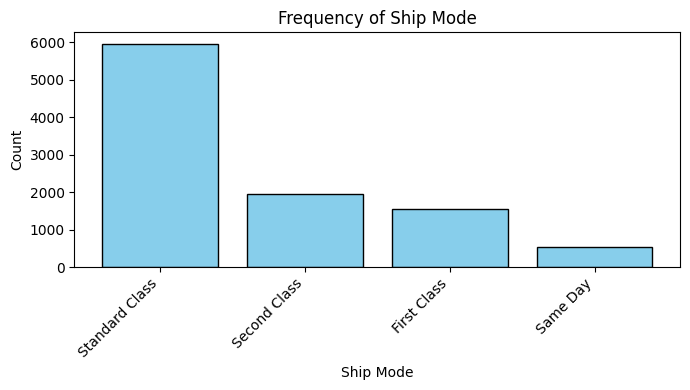

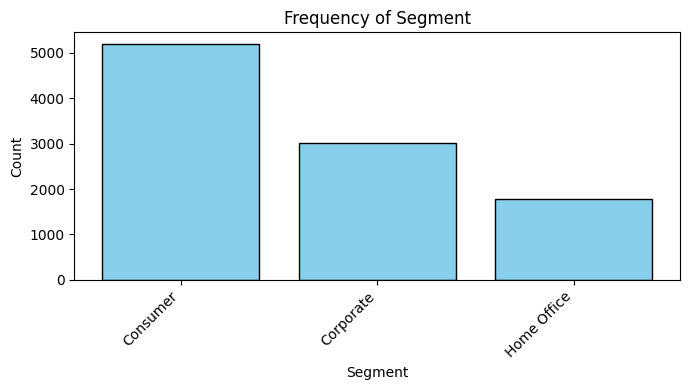

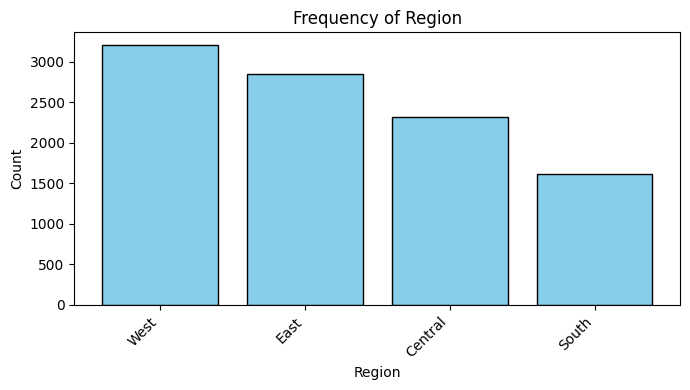

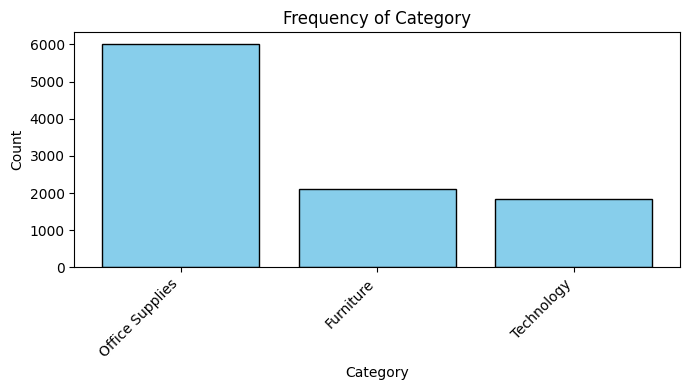

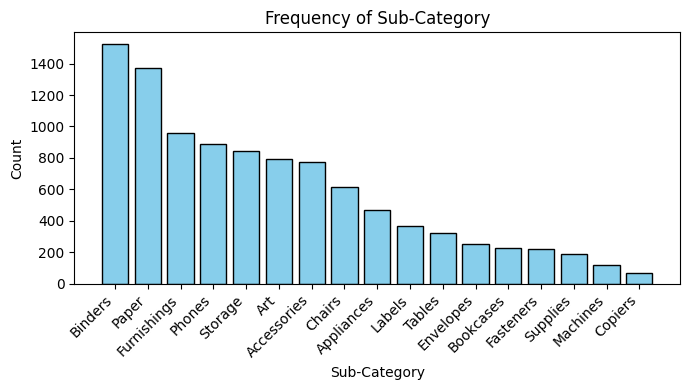

In [ ]:
df = pd.read_excel("Sample - Superstore.xlsx", sheet_name="Orders")

numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
print(df[numeric_cols].describe())

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30,)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

categorical_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    counts = df[col].value_counts()
    plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

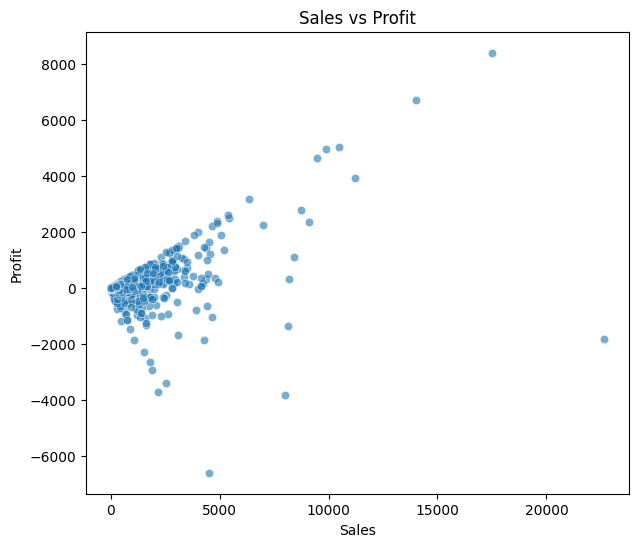

In [ ]:


plt.figure(figsize=(7,6))
sns.scatterplot(x='Sales',y='Profit',data=df,alpha=0.6)
plt.title("Sales vs Profit")
plt.show()



Observations



* The bulk of transactions occur below 5,000 in Sales.
* Profits for these are generally close to zero, with both small gains and small losses.
* A few points show Sales > 10,000, with some generating very high profits (e.g., >8,000) and others producing large losses (~–6,000).Suggests some large deals are either extremely profitable or heavily discounted to the point of loss.


/tmp/ipython-input-3947491031.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region',y='Sales',data=df,estimator=np.mean,ci=None)


Text(0.5, 1.0, 'Average Sales by Region')

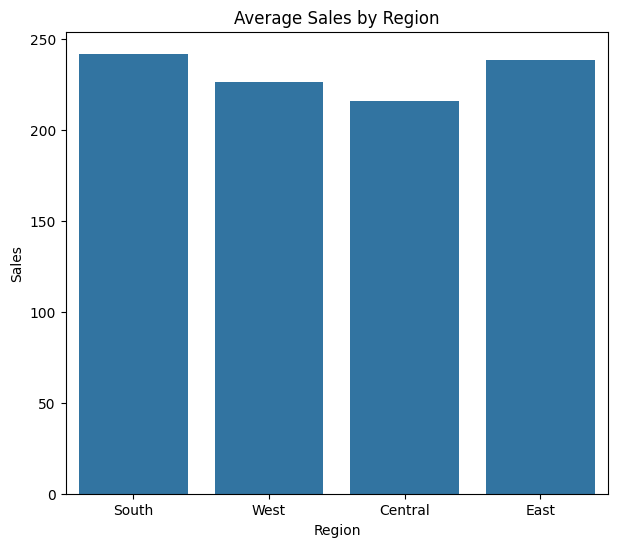

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(x='Region',y='Sales',data=df,estimator=np.mean,ci=None)
plt.title("Average Sales by Region")


* The South region has the highest average sales (~240),
  Suggests strong customer demand or higher-value transactions in these areas.
* The Central region has the lowest average sales (~215).
Indicates either lower-priced products being sold, fewer transactions, or weaker market penetration  



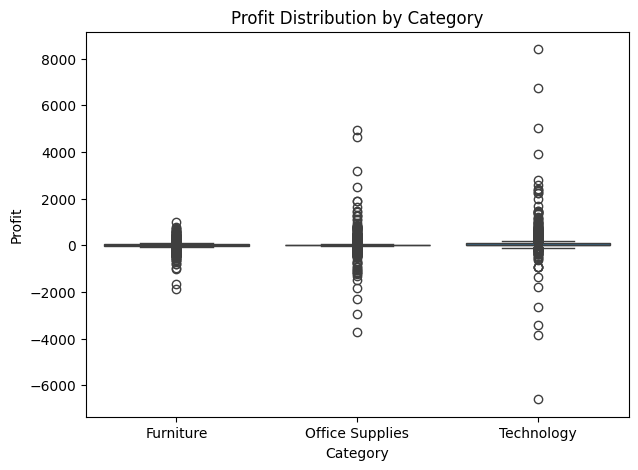

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit Distribution by Category")
plt.show()


* Technology Category
Shows the widest profit range: some orders earn extremely high profits (up to 8,000), but others incur heavy losses (down to 6,000).

* Office Supplies Category
Profit distribution is tightly clustered around zero but still includes occasional high outliers (4,500) and notable losses (4,000).Suggests consistent but modest profitability with fewer extreme deals.

* Furniture Category
Profits are mostly concentrated near zero, with some negative outliers (2,000).
Lower volatility compared to Technology but appears less profitable overall.

*  Extreme outliers (both positive and negative) suggest a few large transactions heavily influence overall profits






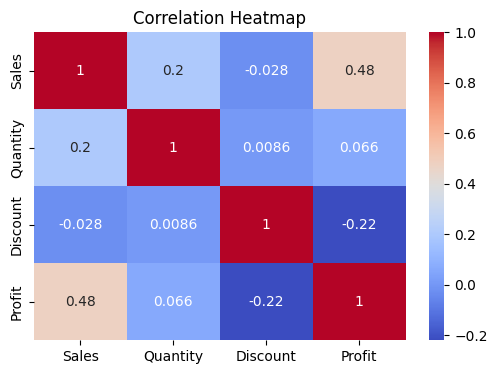

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Strong Positive Correlations:

Sales & Profit (0.48): There's a moderate-to-strong positive relationship between sales volume and profitability, which makes business sense - higher sales generally lead to higher profits.

Weak Correlations:

Sales & Quantity (0.20): Surprisingly weak correlation suggests that higher sales dollars don't necessarily mean more units sold, indicating varying product price points or mix.
Quantity & Discount (0.0086): Almost no relationship between quantity sold and discount levels.
Quantity & Profit (0.066): Very weak correlation suggests that selling more units doesn't strongly drive profit.

Negative Correlations:

Sales & Discount (-0.028): Slight negative correlation suggests discounts don't significantly boost sales revenue.
Discount & Profit (-0.22): Notable negative correlation indicates that higher discounts tend to reduce profitability, as expected

#  Multivariate Analysis

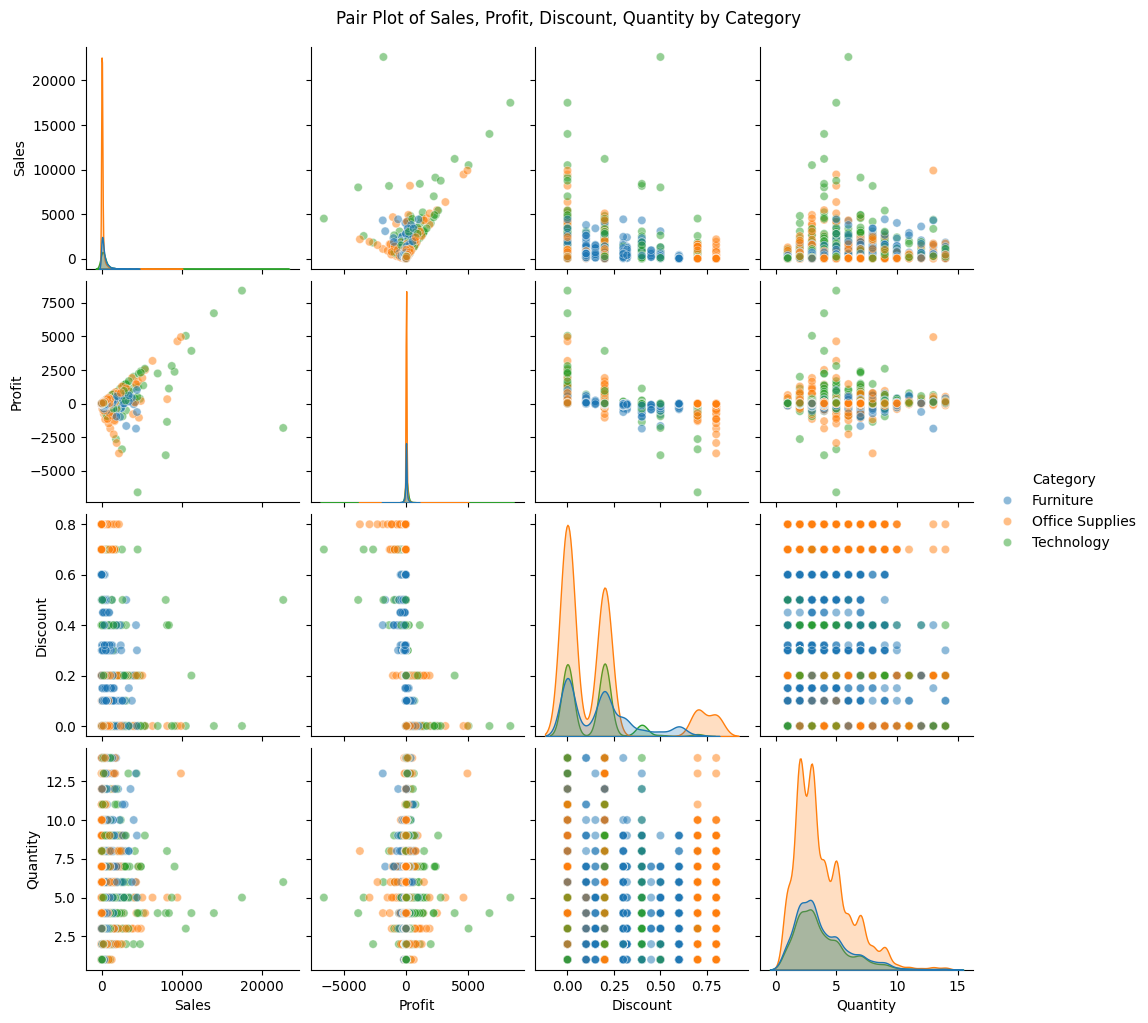

In [ ]:
# Pair plot for numeric variables, colored by Category
sns.pairplot(df, vars=['Sales','Profit','Discount','Quantity'], hue='Category', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Pair Plot of Sales, Profit, Discount, Quantity by Category", y=1.02)
plt.show()


Category Performance Patterns:
Technology (Green):

Highest sales potential with several outliers reaching 20,000+ in sales
Wide profit range from significant losses (-2,500) to high gains (8,000+)
Most variable performance - highest risk but highest reward category
Quantity sold is typically lower (concentrated around 1-5 units)

Furniture (Orange):

Moderate sales range, more consistent than Technology
Narrower profit margins, fewer extreme losses
More predictable business performance
Mid-range quantities sold

Office Supplies (Blue):

Lowest sales values but most consistent
Tight profit margins, rarely exceeding 2,500
Highest quantities sold (up to 14 units)
Most stable, low-risk category

Key Business Insights:
Discount Patterns:

Technology receives the widest range of discounts (0-70%)
Office Supplies and Furniture have more controlled discount strategies
Higher discounts don't correlate with better outcomes across categories

Volume vs. Value Trade-off:

Office Supplies: High volume, low margin business
Technology: Low volume, high margin potential with high variance
Furniture: Balanced approach between volume and value

Risk Profile:

Technology is the "boom or bust" category - potential for large profits but also significant losses
Office Supplies provide steady, predictable returns
Furniture offers moderate growth with controlled risk

/tmp/ipython-input-3133237806.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Profit', hue='Category', estimator=np.mean,ci=None)


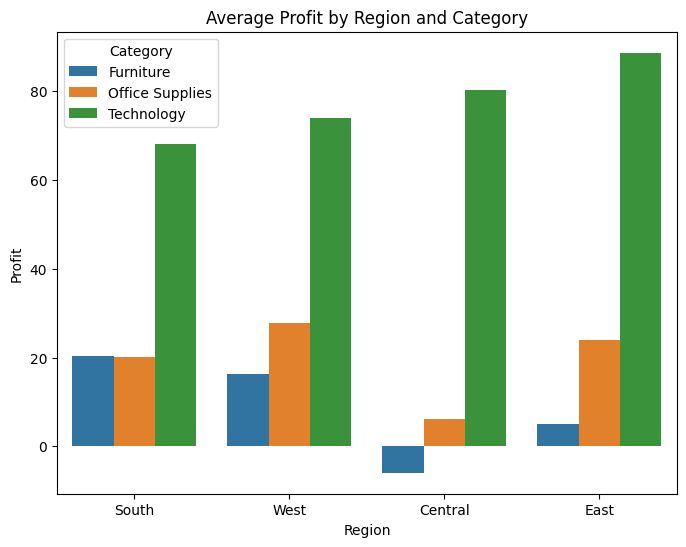

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Region', y='Profit', hue='Category', estimator=np.mean,ci=None)
plt.title("Average Profit by Region and Category")
plt.show()


Technology Dominance Across All Regions

Regional Performance Rankings:
East (Best Overall):

Technology: 90 (highest of any category/region combination)
Office Supplies: 24 (second highest for this category)
Furniture: 5 (lowest performance)

Central:
Technology: 80 (second best)
Office Supplies: 7 (poor performance)
Furniture: Negative profit (1, significant concern)

West:
Technology: 74 (solid performance)
Office Supplies: 29 (highest for this category)
Furniture: 17 (moderate)

South:

Technology: 67 (lowest but still strong)
Office Supplies: 21 (moderate)
Furniture: 21 (best region for furniture)

Category-Specific Regional Insights:
Office Supplies:

West performs best (29 profit)
Significant regional variation (West: 29 vs Central: 7)
Suggests regional preferences or competitive landscape differences

Furniture:

Major regional disparities - profitable in South/West, break-even in East, losing money in Central
Central region furniture strategy needs immediate attention
South shows best furniture profitability

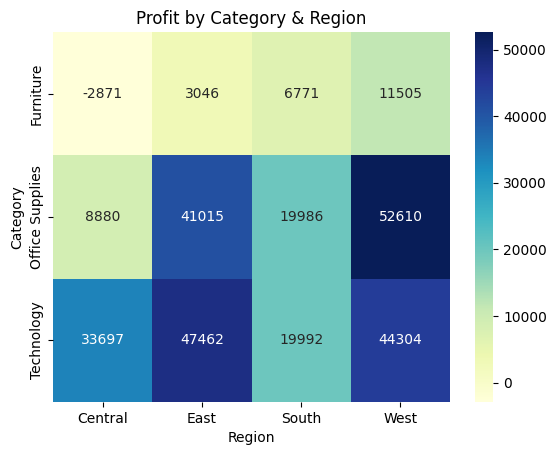

In [ ]:
# Heatmap: Profit by Category & Region
pivot = df.pivot_table(values="Profit", index="Category", columns="Region", aggfunc="sum")
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Profit by Category & Region")
plt.show()

West region generates 37% of total profits despite being just one of four regions
Central region struggles significantly with Furniture, showing a $2,871 loss - this needs immediate attention
Technology category shows consistency across regions with no losses, making it the most reliable profit driver
Furniture profitability is highly region-dependent, suggesting operational or market differences

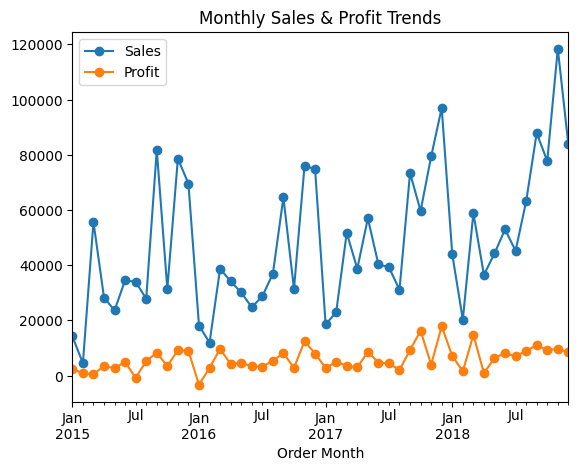

In [ ]:
# Time trends: Sales & Profit monthly
df["Order Month"] = df["Order Date"].dt.to_period("M")
trend = df.groupby("Order Month")[["Sales","Profit"]].sum()
trend.plot(marker="o")
plt.title("Monthly Sales & Profit Trends")
plt.show()

Sales Patterns:

Sales show significant volatility, ranging from around $20,000 to $120,000 per month
There's a dramatic spike at the end of the period (likely December 2018) reaching nearly $120,000
Overall, sales appear to have an upward trend despite the volatility
Several notable peaks occur throughout the timeline, including mid-2015 ($80,000) and early 2018 ($98,000)

Profit Performance:

Profit remains relatively low and stable compared to sales, mostly staying under $20,000 per month
Profit shows much less volatility than sales, suggesting relatively consistent margins or cost structures
There are occasional profit spikes that seem to correspond with some (but not all) sales peaks
The profit line appears relatively flat with modest growth over the time period